# Importing All Necessary Libraries (e.g pandas & np)
# & Setting values for Max column 

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Reading CSV Files into Dataframe

In [2]:
df  = pd.read_csv('students_responses_main.csv')
df_org = df.copy()
df.head()

,Timestamp,Kindly specify your Gender?,Kindly mention your age?,How many members are in your family?,Please specify where are you currently living?,Please mention your parents status?,Kindly tell us about your guardian.,Kindly select your father's education from these options.,Kindly select your mother's education from these options.,Please select your father/guardian monthly Income from these options.,...,Please fill the form. [Do you take nutritions.],Please fill the form. [Do you love sports?],Please fill the form. [Do you value and have confidence of your opinions?],Please fill the form. [Do you take enough sleep? (7-8 hours)],Please fill the form. [Do you do self-directed learning?],Please fill the form. [Do you have depression of study?],Please fill the form. [Do you have believe that you will be succeed in semester in which you are studying.],Please fill the form. [Are atmospheric conditions such as high temperature and humidity tend you to lower mental efficiency.],Please fill the form. [Do you do planning for study?],Please fill the form. [how often you are regular in doing same thing? (any task)]
0,3/8/2022 16:22,Male,19,5,Own House,Other,Father,Graduation,Graduation,Between 75k to 100k,...,Sometimes,Always,Always,Rarely,Always,Often,Always,Often,Always,Often
1,3/8/2022 16:23,Female,19,3,Own House,Together,Both Mother & Father,Graduation,Graduation,Between 50k to 75k,...,Sometimes,Often,Always,Often,Often,Often,Often,Always,Often,Often
2,3/8/2022 16:24,Female,19,5,Own House,Together,Both Mother & Father,Graduation,Graduation,Between 100k to 150k,...,Always,Sometimes,Always,Sometimes,Always,Always,Often,Sometimes,Always,Always
3,3/8/2022 16:25,Male,23,6,Own House,Together,Both Mother & Father,Graduation,Matric,Between 50k to 75k,...,Sometimes,Always,Often,Always,Often,Always,Always,Never,Always,Often
4,3/8/2022 16:25,Male,21,6,Rented House,Together,Both Mother & Father,Graduation,Matric,Between 150k to 200k,...,Often,Always,Always,Always,Always,Rarely,Always,Often,Rarely,Often


# Removing the columns that were not useful (i.e. GPA of each course)

In [3]:
df.drop(columns= df.columns[88],inplace=True)
df.drop(columns= df.columns[74],inplace=True)
df.drop(columns= df.columns[58],inplace=True)
df.drop(columns = df.columns[12:50],inplace = True)
df.drop(columns= df.columns[10],inplace=True)
df.drop(columns= df.columns[8],inplace=True)
df.drop(columns= df.columns[7],inplace=True)
df.drop(columns= df.columns[0],inplace=True)

# Replacing Semesters

In [4]:
df['Kindly choose your current semester.']=df['Kindly choose your current semester.'].str.replace('2 Semester','1 Semester',regex=True).str.replace('3 Semester','2 Semester',regex=True) .str.replace ('4 Semester','3 Semester',regex=True).str.replace ('5 Semester','4 Semester',regex=True).str.replace ('6 Semester','5 Semester',regex=True).str.replace('7 Semester','6 Semester',regex=True).str.replace('8 Semester','7 Semester',regex=True)

# Correcting Matric & FSC Marks Columns (e.g into percentage[%])

In [5]:

df['Your matric marks percentage?'] = np.where(df['Your matric marks percentage?'] > 100,
                                               df['Your matric marks percentage?'] * 100 / 1100,
                                               df['Your matric marks percentage?'])


df["Your Fsc/Ics marks percentage?"] = np.where(df["Your Fsc/Ics marks percentage?"] > 100,
                                                df["Your Fsc/Ics marks percentage?"]* 100/1100,
                                                df["Your Fsc/Ics marks percentage?"])

# All decimals Upto 2 (e.g 2.2141 to 2.21)

In [6]:
df.round(decimals =2)

,Kindly specify your Gender?,Kindly mention your age?,How many members are in your family?,Please specify where are you currently living?,Please mention your parents status?,Kindly tell us about your guardian.,Please select your father/guardian monthly Income from these options.,Please select your monthly Income ?,Please mention your Previous Semester GPA?,Your matric marks percentage?,...,Please fill the form. [Do you take nutritions.],Please fill the form. [Do you love sports?],Please fill the form. [Do you value and have confidence of your opinions?],Please fill the form. [Do you take enough sleep? (7-8 hours)],Please fill the form. [Do you do self-directed learning?],Please fill the form. [Do you have depression of study?],Please fill the form. [Do you have believe that you will be succeed in semester in which you are studying.],Please fill the form. [Are atmospheric conditions such as high temperature and humidity tend you to lower mental efficiency.],Please fill the form. [Do you do planning for study?],Please fill the form. [how often you are regular in doing same thing? (any task)]
0,Male,19,5,Own House,Other,Father,Between 75k to 100k,Between 10k to 25k,2.60,90.00,...,Sometimes,Always,Always,Rarely,Always,Often,Always,Often,Always,Often
1,Female,19,3,Own House,Together,Both Mother & Father,Between 50k to 75k,Between 10k to 25k,2.80,89.00,...,Sometimes,Often,Always,Often,Often,Often,Often,Always,Often,Often
2,Female,19,5,Own House,Together,Both Mother & Father,Between 100k to 150k,Don't do freelancing,2.69,91.00,...,Always,Sometimes,Always,Sometimes,Always,Always,Often,Sometimes,Always,Always
3,Male,23,6,Own House,Together,Both Mother & Father,Between 50k to 75k,Between 100k to 150k,2.40,92.17,...,Sometimes,Always,Often,Always,Often,Always,Always,Never,Always,Often
4,Male,21,6,Rented House,Together,Both Mother & Father,Between 150k to 200k,Don't do freelancing,3.10,89.00,...,Often,Always,Always,Always,Always,Rarely,Always,Often,Rarely,Often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,Female,22,5,Rented House,Together,Both Mother & Father,Between 450k to 500k,Less than 10k,2.60,88.00,...,Always,Always,Always,Always,Often,Often,Often,Sometimes,Sometimes,Often
639,Male,21,5,Own House,Together,Relative,Between 500k to 550k,Don't do freelancing,3.35,85.00,...,Sometimes,Sometimes,Often,Rarely,Often,Often,Often,Often,Often,Often
640,Male,22,5,Own House,Together,Father,Between 75k to 100k,Don't do freelancing,3.40,83.00,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes
641,Male,26,7,Rented House,Together,Both Mother & Father,Father don't do any job,Don't do freelancing,2.83,90.00,...,Never,Rarely,Sometimes,Sometimes,Rarely,Never,Sometimes,Never,Rarely,Rarely


# Removing Outliars

<h3> Check before Removing Outliars </h3>

In [7]:
df.describe()

,Kindly mention your age?,How many members are in your family?,Please mention your Previous Semester GPA?,Your matric marks percentage?,Your Fsc/Ics marks percentage?,Please mention your NTS score?,How much you have interest in this domain,Are you satisfied with your program selection?,Please provide your current CGPA?,Do you find your CS/SE subjects difficult?,Do you love your subjects?,How is your health,Do you like your teacher methodology,Kindly specify do you love travelling?,Do you love reading books?
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,636.000000,643.000000,643.000000,643.000000,643.000000,640.000000,640.000000,643.000000,643.000000
mean,20.371695,5.928460,3.009611,86.826523,81.505692,76.205941,3.869497,3.723173,2.976409,3.321928,3.225505,3.725000,3.151562,4.000000,2.970451
std,2.505497,4.390004,4.386389,10.362734,29.511367,23.514766,1.069379,1.167262,3.883473,1.012662,1.041433,1.062669,1.060235,1.197089,1.317530
min,17.000000,1.000000,0.000100,0.100000,0.100000,0.100000,1.000000,1.000000,0.000010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,5.000000,2.500000,84.000000,75.000000,72.000000,3.000000,3.000000,2.600000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,20.000000,6.000000,2.830000,89.000000,82.000000,79.000000,4.000000,4.000000,2.890000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,21.000000,6.000000,3.200000,92.000000,86.000000,84.000000,5.000000,5.000000,3.160000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,69.000000,108.000000,100.000000,100.000000,788.909091,420.000000,5.000000,5.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<h3> 15% Remove from top and bottom  </h3> 

In [8]:
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

C:\Users\hppav\AppData\Local\Temp\ipykernel_8544\4087490729.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


,Kindly specify your Gender?,Kindly mention your age?,How many members are in your family?,Please specify where are you currently living?,Please mention your parents status?,Kindly tell us about your guardian.,Please select your father/guardian monthly Income from these options.,Please select your monthly Income ?,Please mention your Previous Semester GPA?,Your matric marks percentage?,...,Please fill the form. [Do you take nutritions.],Please fill the form. [Do you love sports?],Please fill the form. [Do you value and have confidence of your opinions?],Please fill the form. [Do you take enough sleep? (7-8 hours)],Please fill the form. [Do you do self-directed learning?],Please fill the form. [Do you have depression of study?],Please fill the form. [Do you have believe that you will be succeed in semester in which you are studying.],Please fill the form. [Are atmospheric conditions such as high temperature and humidity tend you to lower mental efficiency.],Please fill the form. [Do you do planning for study?],Please fill the form. [how often you are regular in doing same thing? (any task)]
0,Male,19,5,Own House,Other,Father,Between 75k to 100k,Between 10k to 25k,2.60,90.00,...,Sometimes,Always,Always,Rarely,Always,Often,Always,Often,Always,Often
1,Female,19,3,Own House,Together,Both Mother & Father,Between 50k to 75k,Between 10k to 25k,2.80,89.00,...,Sometimes,Often,Always,Often,Often,Often,Often,Always,Often,Often
2,Female,19,5,Own House,Together,Both Mother & Father,Between 100k to 150k,Don't do freelancing,2.69,91.00,...,Always,Sometimes,Always,Sometimes,Always,Always,Often,Sometimes,Always,Always
3,Male,23,6,Own House,Together,Both Mother & Father,Between 50k to 75k,Between 100k to 150k,2.40,92.17,...,Sometimes,Always,Often,Always,Often,Always,Always,Never,Always,Often
4,Male,21,6,Rented House,Together,Both Mother & Father,Between 150k to 200k,Don't do freelancing,3.10,89.00,...,Often,Always,Always,Always,Always,Rarely,Always,Often,Rarely,Often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,Female,22,5,Rented House,Together,Both Mother & Father,Between 450k to 500k,Less than 10k,2.60,88.00,...,Always,Always,Always,Always,Often,Often,Often,Sometimes,Sometimes,Often
639,Male,21,5,Own House,Together,Relative,Between 500k to 550k,Don't do freelancing,3.35,85.00,...,Sometimes,Sometimes,Often,Rarely,Often,Often,Often,Often,Often,Often
640,Male,22,5,Own House,Together,Father,Between 75k to 100k,Don't do freelancing,3.40,83.00,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes
641,Male,26,7,Rented House,Together,Both Mother & Father,Father don't do any job,Don't do freelancing,2.83,90.00,...,Never,Rarely,Sometimes,Sometimes,Rarely,Never,Sometimes,Never,Rarely,Rarely


<h3> Check After Removing Outliars </h3>

In [9]:
df.describe()

,Kindly mention your age?,How many members are in your family?,Please mention your Previous Semester GPA?,Your matric marks percentage?,Your Fsc/Ics marks percentage?,Please mention your NTS score?,How much you have interest in this domain,Are you satisfied with your program selection?,Please provide your current CGPA?,Do you find your CS/SE subjects difficult?,Do you love your subjects?,How is your health,Do you like your teacher methodology,Kindly specify do you love travelling?,Do you love reading books?
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,570.000000,576.000000,576.000000,576.000000,576.000000,573.000000,573.000000,576.000000,576.000000
mean,20.291667,5.663194,2.844132,87.407890,80.099607,79.042917,3.877193,3.720486,2.890295,3.319444,3.222222,3.727749,3.136126,3.996528,2.960069
std,1.466733,1.365831,0.541953,6.209160,8.396338,8.306247,1.038286,1.131370,0.460065,0.994963,1.012578,1.025487,1.021946,1.178055,1.304228
min,17.000000,2.000000,0.540000,60.000000,50.000000,45.000000,1.000000,1.000000,1.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,5.000000,2.550000,84.000000,75.000000,73.000000,3.000000,3.000000,2.640000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,20.000000,6.000000,2.850000,89.000000,81.000000,79.000000,4.000000,4.000000,2.900000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,21.000000,6.000000,3.200000,92.000000,85.625000,85.000000,5.000000,5.000000,3.162500,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,26.000000,11.000000,4.000000,99.090909,99.181800,110.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Factorizing Data i.e. Converting to numeric (Male [1] & Female[0])

In [10]:
def factorize_fun(data):
    obj_cols = data.loc[:, data.dtypes == object].columns
    for col in obj_cols:
        data[col] = pd.factorize(data[col])[0] +1
    return data

df=factorize_fun(df)


# Label Encoder i.e. Converting to numeric

In [11]:
# from sklearn.preprocessing import LabelEncoder
# def Encoder(df):
#           columnsToEncode = list(df.select_dtypes(include=['category','object']))
#           le = LabelEncoder()
#           for feature in columnsToEncode:
#               try:
#                   df[feature] = le.fit_transform(df[feature])
#               except:
#                   print('Error encoding '+feature)
#           return df
    
# df=Encoder(df)
# df

# Changing Null Values with Knn Imputer with second neighbour.

In [12]:
import numpy as np
from sklearn.impute import KNNImputer
        
def knn_null(df):
    imputer = KNNImputer(n_neighbors=2)
    df1 = imputer.fit_transform(df)
    df2 = pd.DataFrame(df1, columns = df.columns)
    return df2

df=knn_null(df)
df
# df.isnull().sum().to_csv("Testing.csv")

,Kindly specify your Gender?,Kindly mention your age?,How many members are in your family?,Please specify where are you currently living?,Please mention your parents status?,Kindly tell us about your guardian.,Please select your father/guardian monthly Income from these options.,Please select your monthly Income ?,Please mention your Previous Semester GPA?,Your matric marks percentage?,...,Please fill the form. [Do you take nutritions.],Please fill the form. [Do you love sports?],Please fill the form. [Do you value and have confidence of your opinions?],Please fill the form. [Do you take enough sleep? (7-8 hours)],Please fill the form. [Do you do self-directed learning?],Please fill the form. [Do you have depression of study?],Please fill the form. [Do you have believe that you will be succeed in semester in which you are studying.],Please fill the form. [Are atmospheric conditions such as high temperature and humidity tend you to lower mental efficiency.],Please fill the form. [Do you do planning for study?],Please fill the form. [how often you are regular in doing same thing? (any task)]
0,1.0,19.0,5.0,1.0,1.0,1.0,1.0,1.0,2.60,90.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,19.0,3.0,1.0,2.0,2.0,2.0,1.0,2.80,89.00,...,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
2,2.0,19.0,5.0,1.0,2.0,2.0,3.0,2.0,2.69,91.00,...,2.0,3.0,1.0,3.0,1.0,2.0,2.0,3.0,1.0,2.0
3,1.0,23.0,6.0,1.0,2.0,2.0,2.0,3.0,2.40,92.17,...,1.0,1.0,2.0,4.0,2.0,2.0,1.0,4.0,1.0,1.0
4,1.0,21.0,6.0,2.0,2.0,2.0,4.0,2.0,3.10,89.00,...,3.0,1.0,1.0,4.0,1.0,3.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2.0,22.0,5.0,2.0,2.0,2.0,16.0,4.0,2.60,88.00,...,2.0,1.0,1.0,4.0,2.0,1.0,2.0,3.0,4.0,1.0
572,1.0,21.0,5.0,1.0,2.0,4.0,20.0,2.0,3.35,85.00,...,1.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0
573,1.0,22.0,5.0,1.0,2.0,1.0,1.0,2.0,3.40,83.00,...,1.0,3.0,5.0,1.0,4.0,3.0,4.0,5.0,4.0,3.0
574,1.0,26.0,7.0,2.0,2.0,2.0,6.0,2.0,2.83,90.00,...,5.0,5.0,5.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0


In [13]:
# Removing null

# Separating Features and Target Column

# Input(X)

In [14]:
X = df.drop(columns =['Please mention your Previous Semester GPA?'])
X

,Kindly specify your Gender?,Kindly mention your age?,How many members are in your family?,Please specify where are you currently living?,Please mention your parents status?,Kindly tell us about your guardian.,Please select your father/guardian monthly Income from these options.,Please select your monthly Income ?,Your matric marks percentage?,Did you get any scholarship from school?,...,Please fill the form. [Do you take nutritions.],Please fill the form. [Do you love sports?],Please fill the form. [Do you value and have confidence of your opinions?],Please fill the form. [Do you take enough sleep? (7-8 hours)],Please fill the form. [Do you do self-directed learning?],Please fill the form. [Do you have depression of study?],Please fill the form. [Do you have believe that you will be succeed in semester in which you are studying.],Please fill the form. [Are atmospheric conditions such as high temperature and humidity tend you to lower mental efficiency.],Please fill the form. [Do you do planning for study?],Please fill the form. [how often you are regular in doing same thing? (any task)]
0,1.0,19.0,5.0,1.0,1.0,1.0,1.0,1.0,90.00,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,19.0,3.0,1.0,2.0,2.0,2.0,1.0,89.00,1.0,...,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
2,2.0,19.0,5.0,1.0,2.0,2.0,3.0,2.0,91.00,2.0,...,2.0,3.0,1.0,3.0,1.0,2.0,2.0,3.0,1.0,2.0
3,1.0,23.0,6.0,1.0,2.0,2.0,2.0,3.0,92.17,1.0,...,1.0,1.0,2.0,4.0,2.0,2.0,1.0,4.0,1.0,1.0
4,1.0,21.0,6.0,2.0,2.0,2.0,4.0,2.0,89.00,2.0,...,3.0,1.0,1.0,4.0,1.0,3.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2.0,22.0,5.0,2.0,2.0,2.0,16.0,4.0,88.00,2.0,...,2.0,1.0,1.0,4.0,2.0,1.0,2.0,3.0,4.0,1.0
572,1.0,21.0,5.0,1.0,2.0,4.0,20.0,2.0,85.00,2.0,...,1.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0
573,1.0,22.0,5.0,1.0,2.0,1.0,1.0,2.0,83.00,1.0,...,1.0,3.0,5.0,1.0,4.0,3.0,4.0,5.0,4.0,3.0
574,1.0,26.0,7.0,2.0,2.0,2.0,6.0,2.0,90.00,1.0,...,5.0,5.0,5.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0


# Target(y)

In [15]:
y=df['Please mention your Previous Semester GPA?']
y

0      2.60
1      2.80
2      2.69
3      2.40
4      3.10
       ... 
571    2.60
572    3.35
573    3.40
574    2.83
575    2.93
Name: Please mention your Previous Semester GPA?, Length: 576, dtype: float64

In [16]:
# def z_scores(df):
#   from scipy.stats import zscore
#   import statsmodels.api as sm
#   df_z = zscore(df)
#   df_zscore =pd.DataFrame(df_z)
#   #df_zscore
#   lst = []
#   for col_name in df.columns: 
#     lst.append(col_name)
#   df_zscore.columns = lst
#   df = df_zscore
#   return df

# X=z_scores(X)

# Length X and y

In [17]:
len(X)

576

In [18]:
len(y)

576

In [19]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)


In [20]:
# len(X)

In [21]:
# len(y)

# Normalizing Dataset

In [22]:
from sklearn.preprocessing import MinMaxScaler

def normalize(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    return data_scaled

X=normalize(X)

# Splitting Dataset into Train and Test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [24]:
# R2 Score should close to 100% for better results
# MSE Greater Means Greater Error
# MSE and MAE both range from 0 to infinity, lower values are better.

# OLS-Linear Regression

In [25]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
model = sm.OLS(endog=y_train, exog=X_train).fit()
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" % r2_score(y_test,y_pred))
# print(model.summary())



MAE Score:  0.18050240181561233
MSE Score:  0.05431830092356959
RMSE Score:  0.2330628690365962
R2 score : 0.86


# MultiVariable Linear Regression

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regression = LinearRegression()
model=regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))

MAE Score:  0.15725721629273962
MSE Score:  0.04364570075338829
RMSE Score:  0.2089155349737982
R2 score : 0.88


# Decision Tree Regression 

In [27]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))

MAE Score:  0.21849999999999997
MSE Score:  0.11164843103448276
RMSE Score:  0.33413834116198454
R2 score : 0.70


# Polynomial Regression

In [28]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# poly_reg = PolynomialFeatures(degree = 4)
# X_poly = poly_reg.fit_transform(X_train)
# regressor = LinearRegression()
# model=regressor.fit(X_poly, y_train)
# y_pred = model.predict(poly_reg.transform(X_test))

# print("MAE Score: ", mean_absolute_error(y_test, y_pred))
# print("MSE Score: ", mean_squared_error(y_test, y_pred))
# print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
# print("R2 score : %.2f" %r2_score(y_test,y_pred))


# Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))


MAE Score:  0.15847241379310342
MSE Score:  0.04573557689655171
RMSE Score:  0.21385877792728478
R2 score : 0.88


# Histogram of Target

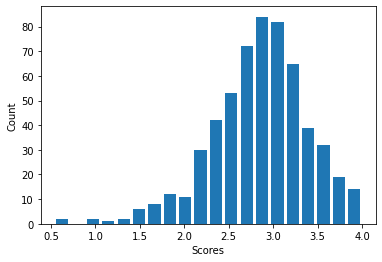

In [30]:
plt.hist(df['Please mention your Previous Semester GPA?'],bins=20,rwidth=0.8)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()

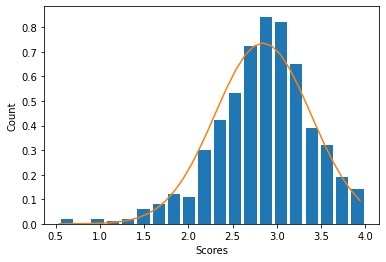

In [31]:
from scipy.stats import norm
import numpy as np
plt.hist(df['Please mention your Previous Semester GPA?'],bins=20,rwidth=0.8,density=True)
plt.xlabel('Scores')
plt.ylabel('Count')
rng=np.arange(df['Please mention your Previous Semester GPA?'].min(),df['Please mention your Previous Semester GPA?'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df['Please mention your Previous Semester GPA?'].mean(),df['Please mention your Previous Semester GPA?'].std()))

# Feature Extraction

# Correlation Statistics with Heatmap

,Selected Features
1,Please provide your current CGPA?
2,Your Fsc/Ics marks percentage?
3,Are you satisfied with your program selection?
4,What you did previously in intermediate?
5,Please mention your NTS score?
6,Kindly choose your current semester.
7,Do you love your subjects?
9,Kindly specify your Gender?
10,Your matric marks percentage?
11,"Please specify, what do you think abilities yo..."


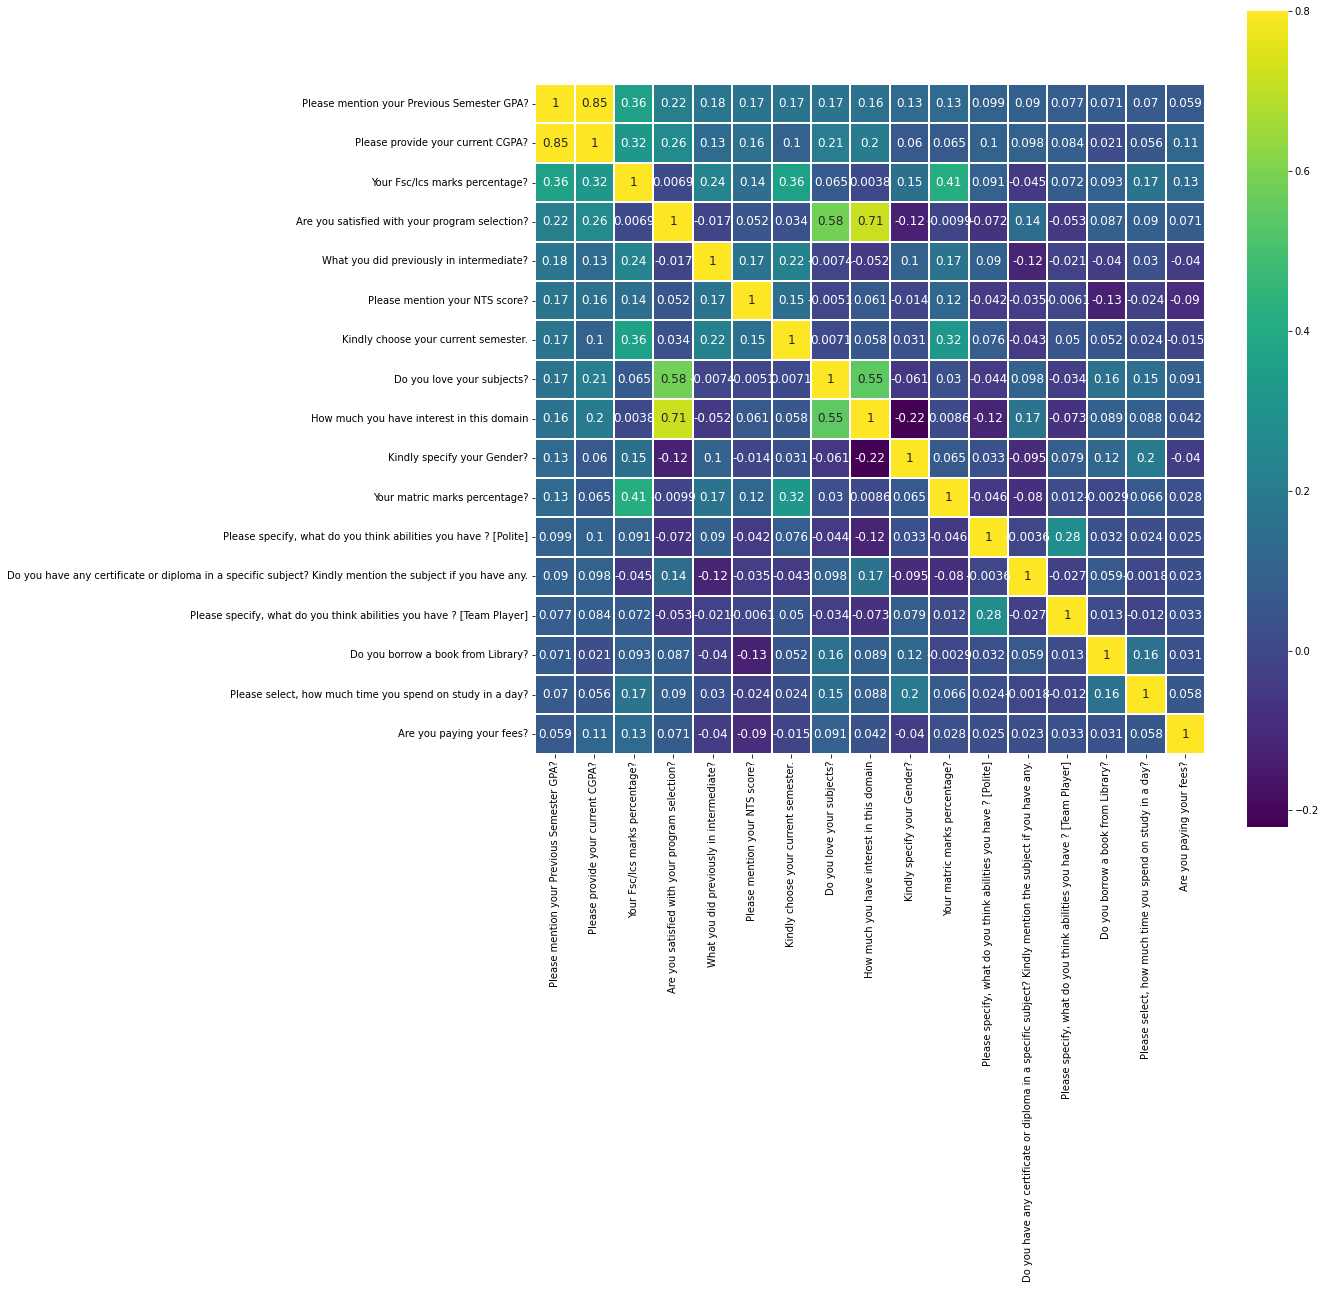

In [32]:
import seaborn as sns

data=df

correlation=data.corr()

k=17
cols=correlation.nlargest(k,'Please mention your Previous Semester GPA?')['Please mention your Previous Semester GPA?'].index
cm=np.corrcoef(data[cols].values.T)
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cm,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels=cols.values,annot_kws={'size':12},yticklabels=cols.values)


cols=pd.DataFrame(cols)
cols=cols.set_axis(["Selected Features"], axis=1)

cols=cols[cols['Selected Features'] != 'Please mention your Previous Semester GPA?']
cols=cols[cols['Selected Features'] != 'How much you have interest in this domain']


df1=df[cols['Selected Features'].tolist()]

import os

#for 15 Cols
path = 'D:\FYP\All python\Selected Features\Only Names Regression'
Regression_final= os.path.join(path,'Corelation_statics_for_RegressionGPA.csv')
cols.to_csv(Regression_final, index=False)
cols

# Selected Columns

In [33]:
cols

,Selected Features
1,Please provide your current CGPA?
2,Your Fsc/Ics marks percentage?
3,Are you satisfied with your program selection?
4,What you did previously in intermediate?
5,Please mention your NTS score?
6,Kindly choose your current semester.
7,Do you love your subjects?
9,Kindly specify your Gender?
10,Your matric marks percentage?
11,"Please specify, what do you think abilities yo..."


In [34]:
df1

,Please provide your current CGPA?,Your Fsc/Ics marks percentage?,Are you satisfied with your program selection?,What you did previously in intermediate?,Please mention your NTS score?,Kindly choose your current semester.,Do you love your subjects?,Kindly specify your Gender?,Your matric marks percentage?,"Please specify, what do you think abilities you have ? [Polite]",Do you have any certificate or diploma in a specific subject? Kindly mention the subject if you have any.,"Please specify, what do you think abilities you have ? [Team Player]",Do you borrow a book from Library?,"Please select, how much time you spend on study in a day?",Are you paying your fees?
0,2.60,70.0,4.0,1.0,70.0,1.0,3.0,1.0,90.00,1.0,1.0,1.0,1.0,1.0,1.0
1,2.50,83.0,5.0,2.0,72.0,1.0,3.0,2.0,89.00,2.0,2.0,2.0,2.0,2.0,1.0
2,2.62,83.0,4.0,1.0,82.0,1.0,4.0,2.0,91.00,1.0,1.0,1.0,3.0,3.0,1.0
3,2.67,70.0,4.0,2.0,72.0,1.0,4.0,1.0,92.17,1.0,1.0,2.0,1.0,1.0,1.0
4,3.00,80.0,4.0,2.0,68.0,1.0,3.0,1.0,89.00,3.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2.60,85.0,4.0,4.0,77.0,3.0,3.0,2.0,88.00,3.0,1.0,4.0,1.0,4.0,1.0
572,2.85,75.0,4.0,4.0,88.0,3.0,4.0,1.0,85.00,3.0,2.0,2.0,2.0,4.0,1.0
573,3.11,84.0,5.0,1.0,64.0,3.0,5.0,1.0,83.00,2.0,3.0,4.0,3.0,9.0,1.0
574,2.83,78.0,4.0,2.0,62.0,3.0,4.0,1.0,90.00,2.0,2.0,1.0,3.0,6.0,1.0


# Divide Train and Test Data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.1, random_state=4)

In [36]:
y_train.shape

(518,)

In [37]:
y_test.shape

(58,)

# OLS-Linear Regression

In [38]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
model = sm.OLS(endog=y_train, exog=X_train).fit()
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

MAE Score:  0.13941496691172714
MSE Score:  0.0395310023264158
RMSE Score:  0.19882404866216713
R2 score : 0.90


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=42, max_features='sqrt', n_estimators=100, max_depth=8, criterion='squared_error')
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))


MAE Score:  0.23334440302471268
MSE Score:  0.10235000641457637
RMSE Score:  0.3199218754861511
R2 score : 0.73


# Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
model=regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))

MAE Score:  0.20712068965517244
MSE Score:  0.08594498275862068
RMSE Score:  0.293163747347145
R2 score : 0.77


# MultiVariable Linear Regression

In [41]:
regression = LinearRegression()
model=regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE Score: ", mean_absolute_error(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : %.2f" %r2_score(y_test,y_pred))

MAE Score:  0.14262573940702744
MSE Score:  0.03766524000220936
RMSE Score:  0.19407534619886516
R2 score : 0.90


# Polynomial Regression

In [42]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# poly_reg = PolynomialFeatures(degree = 4)
# X_poly = poly_reg.fit_transform(X_train)
# regressor = LinearRegression()
# model=regressor.fit(X_poly, y_train)
# y_pred = model.predict(poly_reg.transform(X_test))

# print("MAE Score: ", mean_absolute_error(y_test, y_pred))
# print("MSE Score: ", mean_squared_error(y_test, y_pred))
# print("RMSE Score: ", math.sqrt(mean_squared_error(y_test, y_pred)))
# print("R2 score : %.2f" %r2_score(y_test,y_pred))


In [ ]:
# The MultiVariable Linear Regression model is performing the best overall due to its low error metrics and
# high R² score, making it a stronger predictor compared to the other models here.